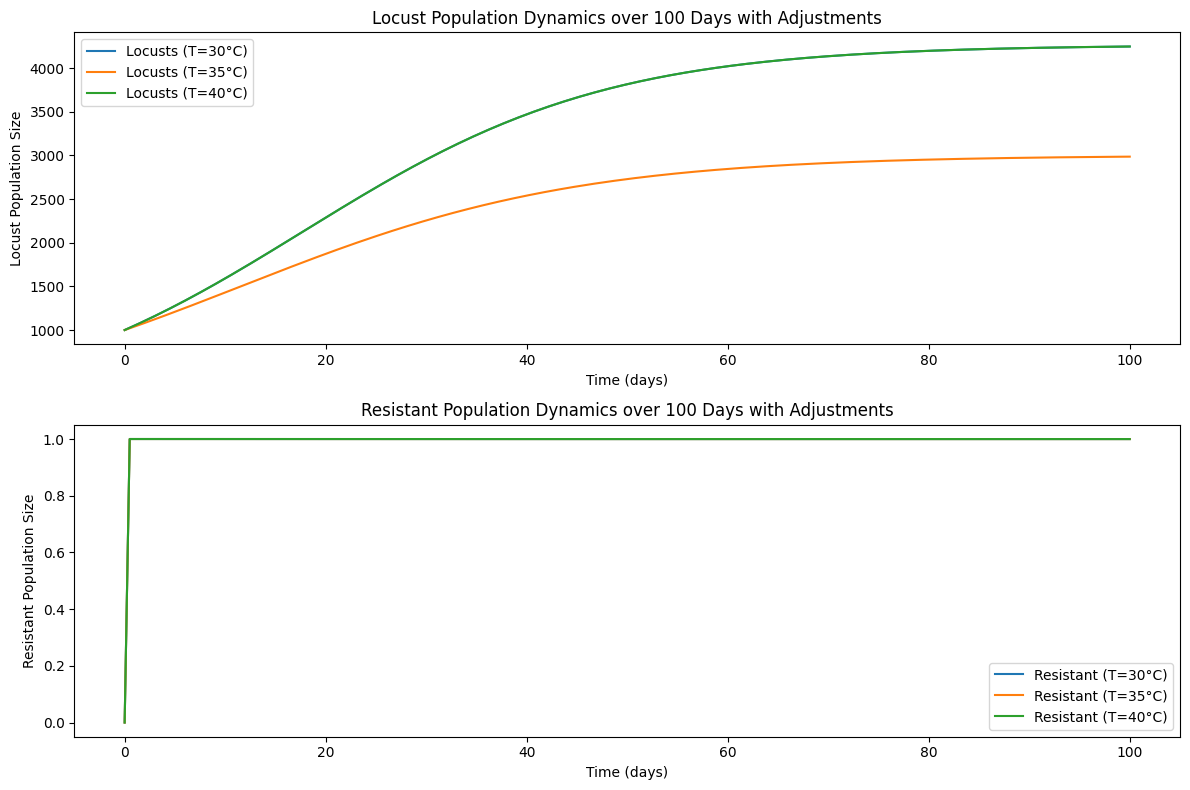

Final populations after 100 days:
At 30°C: Locust population = 4246.16, Resistant population = 1.00
At 35°C: Locust population = 2985.20, Resistant population = 1.00
At 40°C: Locust population = 4246.16, Resistant population = 1.00


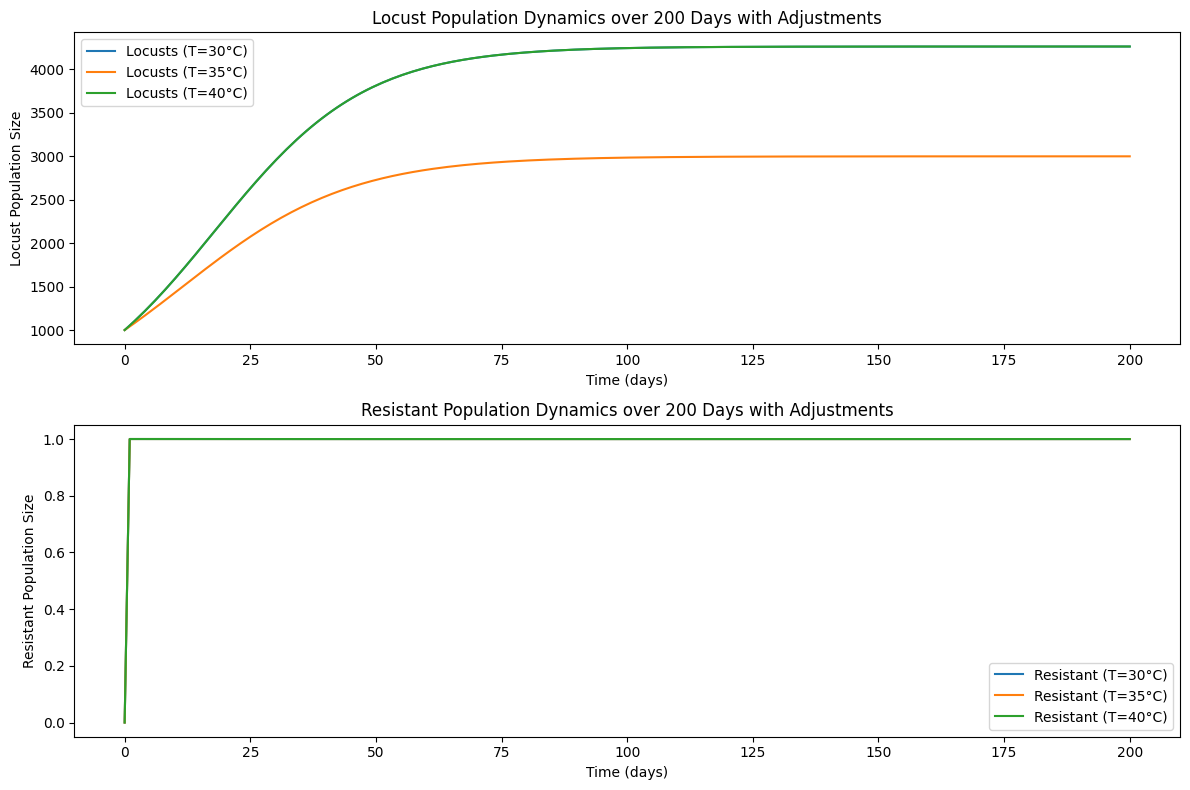

Final populations after 200 days:
At 30°C: Locust population = 4264.22, Resistant population = 1.00
At 35°C: Locust population = 2999.96, Resistant population = 1.00
At 40°C: Locust population = 4264.22, Resistant population = 1.00


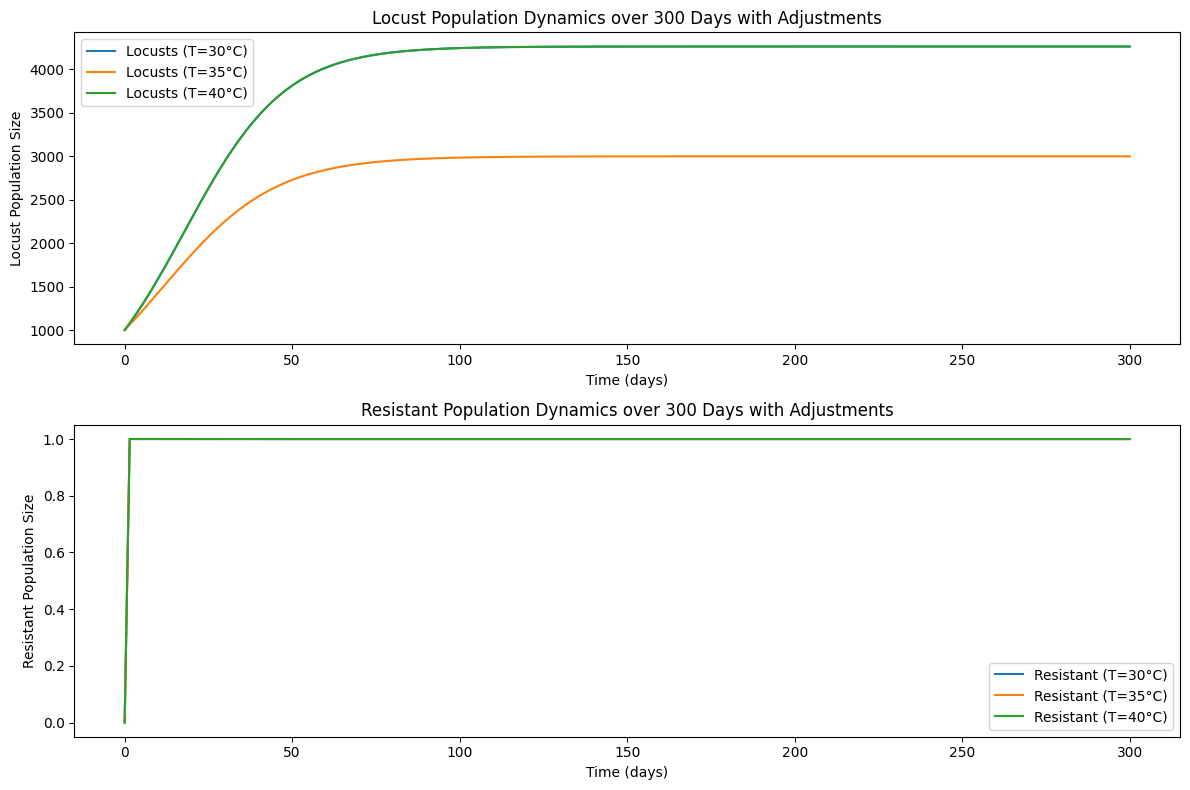

Final populations after 300 days:
At 30°C: Locust population = 4264.24, Resistant population = 1.00
At 35°C: Locust population = 3000.00, Resistant population = 1.00
At 40°C: Locust population = 4264.24, Resistant population = 1.00


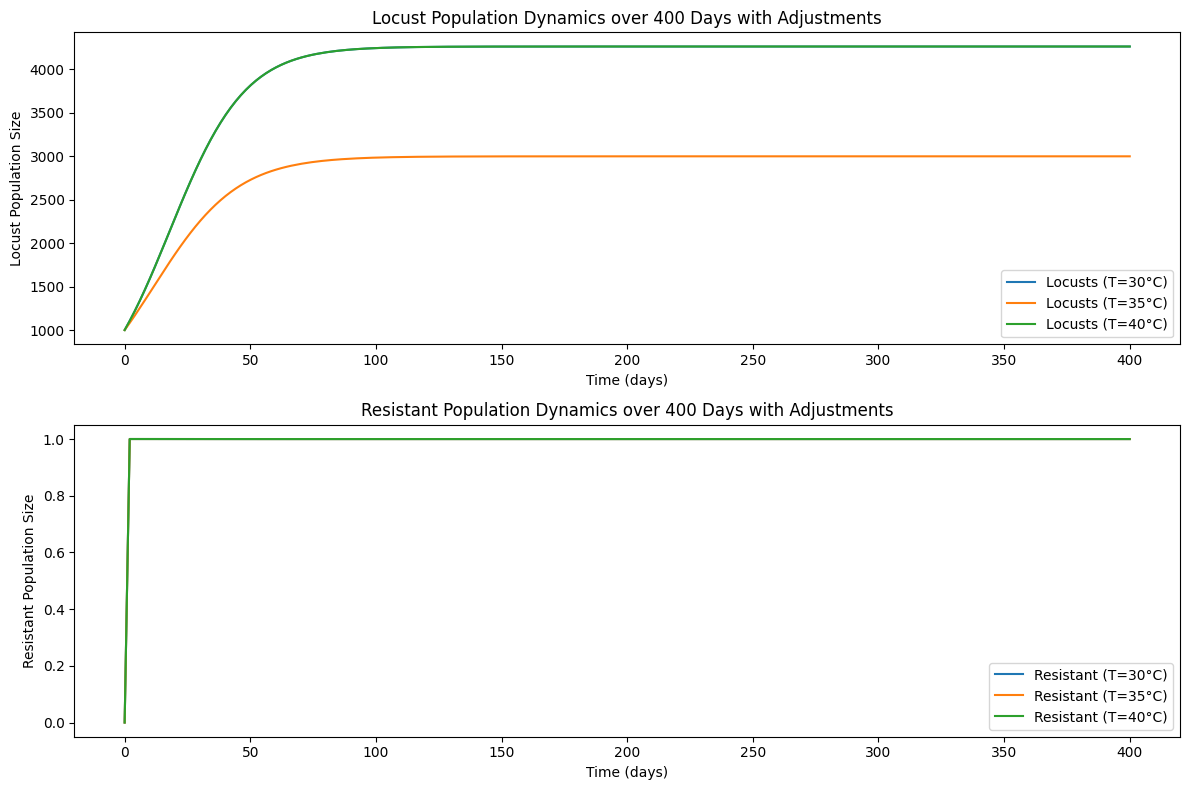

Final populations after 400 days:
At 30°C: Locust population = 4264.24, Resistant population = 1.00
At 35°C: Locust population = 3000.00, Resistant population = 1.00
At 40°C: Locust population = 4264.24, Resistant population = 1.00


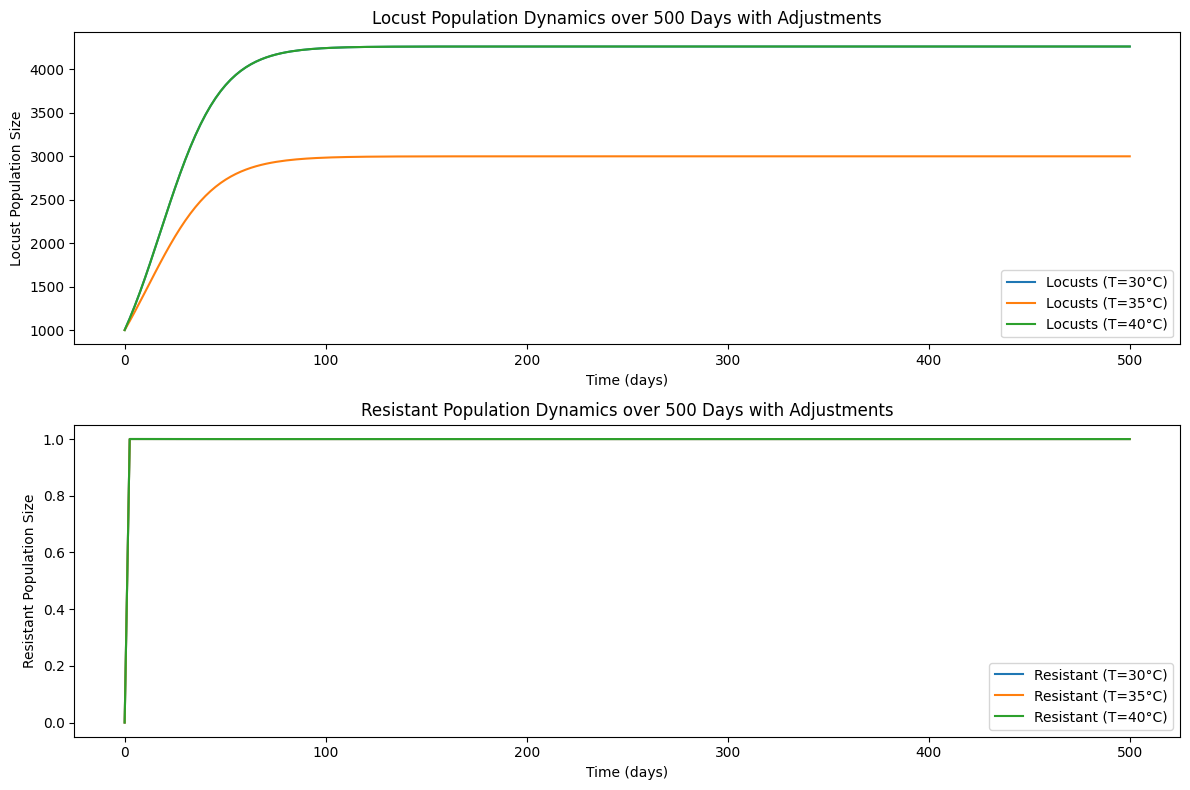

Final populations after 500 days:
At 30°C: Locust population = 4264.24, Resistant population = 1.00
At 35°C: Locust population = 3000.00, Resistant population = 1.00
At 40°C: Locust population = 4264.24, Resistant population = 1.00


In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations
def locust_model(y, t, r0, Topt, alpha_T, mu0, alpha_M, beta_T, M, I, K, gamma0, beta_r, T, mutation_rate):
    N, R = y
    # Temperature-dependent reproduction rate
    r_T = r0 * np.exp(-alpha_T * (T - Topt)**2)
    
    # Temperature and moisture-dependent mortality rate
    mu_TM = mu0 * np.exp(-alpha_M * (M - 0.5)**2) * np.exp(-beta_T * (T - Topt)**2)
    
    # Temperature-dependent resistance development rate
    gamma_T = gamma0 * np.exp(beta_r * (T - Topt))
    
    # Locust population growth
    dNdt = r_T * N * (1 - N/K) - mu_TM * I * N
    
    # Resistance population growth with mutation and selection
    dRdt = mutation_rate + gamma_T * N * I * (1 - R)
    
    return [dNdt, dRdt]

# Initial conditions
N0 = 1000  # Initial locust population
R0 = 0     # Initial resistant population
y0 = [N0, R0]

# Time points (days)
time_windows = [100, 200, 300, 400, 500]  # Consistent time windows to simulate

# Parameters
r0 = 0.1         # Maximum reproduction rate
Topt = 35        # Optimal temperature (°C)
alpha_T = 0.01   # Sensitivity to temperature change
mu0 = 0.05       # Base mortality rate due to insecticide
alpha_M = 0.1    # Moisture sensitivity
beta_T = 0.05    # Temperature sensitivity for insecticide efficacy
K = 5000         # Carrying capacity
gamma0 = 0.05    # Increased baseline resistance development rate
beta_r = 0.02    # Sensitivity of resistance development to temperature
mutation_rate = 0.01  # Mutation rate for resistant locusts

# Environmental conditions
M = 0.5          # Moisture level (normalized between 0 and 1)
I = 0.8          # Increased insecticide concentration
T_values = [30, 35, 40]  # Different temperatures to simulate (°C)

# Solve the system of ODEs for each time window and temperature
for days in time_windows:
    t = np.linspace(0, days, 200)  # Simulate over specified days with 200 time points
    
    solutions = {}
    for T in T_values:
        sol = odeint(locust_model, y0, t, args=(r0, Topt, alpha_T, mu0, alpha_M, beta_T, M, I, K, gamma0, beta_r, T, mutation_rate))
        solutions[T] = sol
    
    # Plot the results
    plt.figure(figsize=(12, 8))
    
    # Plot locust population
    plt.subplot(2, 1, 1)
    for T in T_values:
        plt.plot(t, solutions[T][:, 0], label=f'Locusts (T={T}°C)')
    plt.title(f'Locust Population Dynamics over {days} Days with Adjustments')
    plt.xlabel('Time (days)')
    plt.ylabel('Locust Population Size')
    plt.legend()
    
    # Plot resistant population
    plt.subplot(2, 1, 2)
    for T in T_values:
        plt.plot(t, solutions[T][:, 1], label=f'Resistant (T={T}°C)')
    plt.title(f'Resistant Population Dynamics over {days} Days with Adjustments')
    plt.xlabel('Time (days)')
    plt.ylabel('Resistant Population Size')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    # Function to print final population sizes
    def print_final_populations(solutions, T_values, days):
        print(f"Final populations after {days} days:")
        for T in T_values:
            locust_pop = solutions[T][-1, 0]
            resistant_pop = solutions[T][-1, 1]
            print(f"At {T}°C: Locust population = {locust_pop:.2f}, Resistant population = {resistant_pop:.2f}")

    print_final_populations(solutions, T_values, days)